<a href="https://colab.research.google.com/github/Atharv09007/Cryptonite_taskphas_1/blob/main/Final_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test Accuracy: 0.7238095238095238


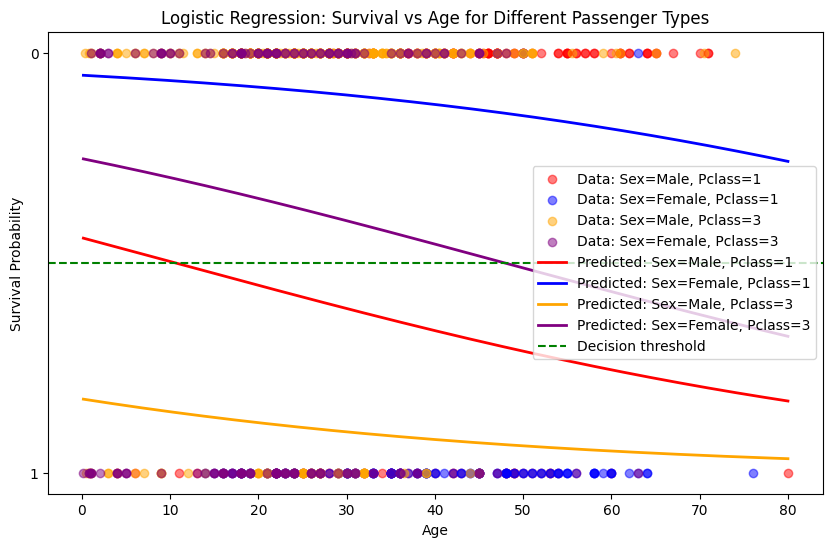

In [3]:
#importing all the important libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import pandas as pd

# Load Titanic dataset
titanic = fetch_openml("titanic", version=1, as_frame=True)
df = titanic.frame

df = df[["age", "sex", "pclass", "survived"]].dropna()#taking the important categories or features and dropping the missing features
df["sex"] = df["sex"].map({"male": 0, "female": 1})#converting the categorised features into numeric
df["pclass"] = df["pclass"].astype(int)#similar to above step converting it into integers

X = df[["age", "sex", "pclass"]].values #converts the data frame of these features into a array so that we can visualize it better
y = df["survived"].astype(int).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#training and spliting the data into training and testing

# Logistic Regression from scratch
class LogisticRegression:
    def __init__(self, lr=0.01, epochs=10000):  #initializing the parameters like learing rate epoches weights and bias
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
#self.weights is a NumPy array that holds one coefficient (parameter) for each feature in X
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
#defining sigmoid using its formula

    def fit(self, X, y):
        n_samples, n_features = X.shape # Get the number of samples (rows) and features (columns) from X
        self.weights = np.zeros(n_features)
    # Initialize weights for each feature as zeros (array of length n_features)
        self.bias = 0
    # initializing the bias as 0
        for _ in range(self.epochs):  # Repeat the training process for a fixed number of epochs
            linear_pred = np.dot(X, self.weights) + self.bias #defining the linear prediction that becomes the X
            y_pred = self.sigmoid(linear_pred)# putting the linear prediction as x in the sigmoid function

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))#the formula for minimizing the loss includes first partial differentiating wrt weights
            db = (1/n_samples) * np.sum(y_pred - y)#then partial differentiating wrt bias

            self.weights -= self.lr * dw#now we are finding the new weights
            self.bias -= self.lr * db#new bias

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)  # predicting the computing weights sum of the features

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int) # if the prediction is above 0.5 make it equal to 1 otherwise 0

# Train model
model = LogisticRegression(lr=0.01, epochs=10000)
model.fit(X_train, y_train)

# Evaluate
accuracy = np.mean(model.predict(X_test) == y_test)
print("Test Accuracy:", accuracy)

# Plot curves
x_vals = np.linspace(X[:,0].min(), X[:,0].max(), 300).reshape(-1,1)
passenger_types = [(0,1), (1,1), (0,3), (1,3)]
colors = ["red", "blue", "orange", "purple"]

plt.figure(figsize=(10,6))

# Plot actual points by sex/pclass
for sex, pclass, color in zip([0,1,0,1], [1,1,3,3], colors):
    mask = (df["sex"]==sex) & (df["pclass"]==pclass)
    plt.scatter(df["age"][mask], df["survived"][mask], alpha=0.5, color=color,
                label=f"Data: Sex={'Female' if sex else 'Male'}, Pclass={pclass}")

# Plot predicted curves
for (sex, pclass), color in zip(passenger_types, colors):
    X_plot = np.hstack([
        x_vals,
        np.full_like(x_vals, sex),
        np.full_like(x_vals, pclass)
    ])
    y_probs = model.predict_proba(X_plot)
    plt.plot(x_vals, y_probs, color=color, linewidth=2,
             label=f"Predicted: Sex={'Female' if sex else 'Male'}, Pclass={pclass}")

plt.axhline(0.5, color="green", linestyle="--", label="Decision threshold")
plt.xlabel("Age")
plt.ylabel("Survival Probability")
plt.title("Logistic Regression: Survival vs Age for Different Passenger Types")
plt.ylim(-0.05, 1.05)
plt.legend()
plt.show()
